Zadanie 1: Stwórz sieć rekurencyjną typu SimpleRNN przy użyciu biblioteki Keras i naucz ją przewidywać kolejne elementy w ciągu czasowym.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [2]:
timesteps = 50
data = np.sin(np.arange(timesteps))


In [3]:
def prepare_data(data, timesteps):
    X, y = [], []
    for i in range(len(data)-timesteps-1):
        X.append(data[i:(i+timesteps)])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

X, y = prepare_data(data, 10)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [4]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.fit(X_train, y_train, epochs=5, batch_size=16)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7013
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4582 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2154 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0879
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0192


In [6]:
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 0.0029
Loss: 0.002890937961637974


In [7]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


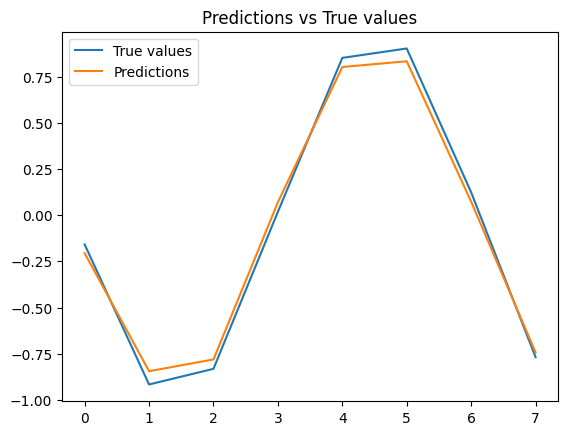

In [8]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()


Zadanie 2: Stwórz sieć rekurencyjną typu SimpleRNN przy użyciu biblioteki Keras i naucz ją generować tekst na podstawie dostarczonego zbioru danych tekstowych.

In [16]:
import tensorflow as tf

import numpy as np
import os
import time

In [17]:
path_to_file = tf.keras.utils.get_file('/content/shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras.optimizers import RMSprop

# Wczytanie danych tekstowych
with open('shakespeare.txt', 'r') as f:
    text = f.read().lower()
print('Długość tekstu:', len(text))

# Tworzenie słownika znaków
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Przygotowanie sekwencji danych wejściowych i wyjściowych
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i:i + maxlen])
    next_chars.append(text[i + maxlen])
print('Liczba sekwencji:', len(sentences))

# Przygotowanie danych wejściowych i wyjściowych
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Długość tekstu: 1115394
Liczba sekwencji: 371785


In [20]:
# Definicja modelu sieci rekurencyjnej
model = Sequential()
model.add(SimpleRNN(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# Kompilacja modelu
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Nauczanie modelu
model.fit(x, y, batch_size=128, epochs=8)


Epoch 1/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 103s 35ms/step - loss: 2.9320
Epoch 2/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 146s 36ms/step - loss: 2.5429
Epoch 3/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 139s 35ms/step - loss: 2.4251
Epoch 4/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 101s 35ms/step - loss: 2.3756
Epoch 5/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 146s 36ms/step - loss: 2.4012
Epoch 6/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 138s 35ms/step - loss: 2.8233
Epoch 7/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 143s 35ms/step - loss: 2.9852
Epoch 8/8
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 141s 35ms/step - loss: 3.0570


In [21]:
# Generowanie tekstu
start_index = np.random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index:start_index + maxlen]
print('--- Początek generowanego tekstu: "' + generated_text + '"')

for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text):
        x_pred[0, t, char_indices[char]] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.argmax(preds)
    next_char = indices_char[next_index]
    generated_text += next_char
    generated_text = generated_text[1:]

print('--- Wygenerowany tekst: "' + generated_text + '"')

--- Początek generowanego tekstu: "
3 king henry vi

king edward iv:
once m"
--- Wygenerowany tekst: "
 oo  oanon h mano 

ano ao ar:yoa:
mon "


Zadanie 3: Stwórz sieć rekurencyjną typu SimpleRNN przy użyciu biblioteki Keras i naucz ją klasyfikować tekst na podstawie dostarczonego zbioru danych tekstowych.

In [22]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ustalenie hiperparametrów
max_features = 10000  # maksymalna liczba słów
maxlen = 100  # maksymalna długość sekwencji słów
batch_size = 32
embedding_dims = 50  # liczba wymiarów przestrzeni osadzeń słów
hidden_dims = 32  # liczba neuronów w warstwie ukrytej

# załadowanie danych IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# dostosowanie długości sekwencji słów
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# utworzenie modelu sieci neuronowej
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(SimpleRNN(hidden_dims))
model.add(Dense(1, activation='sigmoid'))

# kompilacja modelu
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# uczenie modelu
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.6623 - loss: 0.6015 - val_accuracy: 0.7836 - val_loss: 0.4661
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8509 - loss: 0.3497 - val_accuracy: 0.7932 - val_loss: 0.4370


In [23]:
# Przygotowanie słownika mapowania identyfikatorów słów na słowa
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Wybór losowej sekwencji tekstowej z testowego zestawu danych
sample = np.random.randint(len(x_test))
text = x_test[sample]
label = y_test[sample]

# Wartości w zakresie 0-2 są zarezerwowane dla specjalnych znaków, zacznijmy od indeksu 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(f"Tekst: {decoded_review}")
print(f"Etykieta:{label}")

# Dokonanie predykcji na przykładowych danych
prediction = model.predict(np.array([text]))
print(f"Predykcja: {prediction[0]}")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tekst: king of queens has in an era where most sitcoms have ? jokes and are on the whole mediocre king of queens continues to push the sitcom ? and show real comic genius critics of this show obviously don't get it or haven't watched the show enough to give it a chance because anyone with real comic and creative sensibility has to laugh out loud while watching it's certainly on par with my other two favorites seinfeld and the office in its ridiculous tone it's the ? and michael ? of tv that keep us watching and laughing out loud
Etykieta:1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predykcja: [0.5268257]


Zadanie 4: Stwórz sieć rekurencyjną typu LSTM przy użyciu biblioteki Keras i naucz ją klasyfikować tekst na podstawie dostarczonego zbioru danych tekstowych.

In [24]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# set hyperparameters
max_features = 10000  # maximum number of words
maxlen = 100  # maximum sequence length
batch_size = 32
embedding_dims = 50  # dimensionality of word embeddings
hidden_dims = 32  # number of neurons in the hidden layer

# load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# adjust sequence lengths
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# build the neural network model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(hidden_dims))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 59ms/step - accuracy: 0.7278 - loss: 0.5112 - val_accuracy: 0.8507 - val_loss: 0.3389
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.8950 - loss: 0.2668 - val_accuracy: 0.8501 - val_loss: 0.3506


In [ ]:
# Przygotowanie słownika mapowania identyfikatorów słów na słowa
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Wybór losowej sekwencji tekstowej z testowego zestawu danych
sample = np.random.randint(len(x_test))
text = x_test[sample]
label = y_test[sample]

# Wartości w zakresie 0-2 są zarezerwowane dla specjalnych znaków, zacznijmy od indeksu 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(f"Tekst: {decoded_review}")
print(f"Etykieta:{label}")

# Dokonanie predykcji na przykładowych danych
prediction = model.predict(np.array([text]))
print(f"Predykcja: {prediction[0]}")


Tekst: howard hughes in his all too successful effort to kill off rko radio pictures br br the movie kills its first opportunity to show off sexy jane when it places her in a bubble bath and then has her singing i'll be switched if i ain't ? ? and it's all downhill from there in her autobiography russell ? for the movie's number ? for trouble because it was supposedly so ? nowadays you could show it on the disney channel by the way said autobiography has a jaw dropping photo of russell in a bikini far ? than anything
Etykieta:0
1/1 [==============================] - 1s 645ms/step
Predykcja: [0.02273359]


Zadanie 5: Stwórz sieć rekurencyjną (z wykorzystaniem GRU) przy użyciu biblioteki Keras i naucz ją klasyfikować tekst na podstawie dostarczonego zbioru danych tekstowych.

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 20000  # Liczba słów, które chcemy zastosować w analizie
maxlen = 80  # Maksymalna liczba słów w recenzji
batch_size = 32  # Liczba recenzji przetwarzana jednocześnie

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# Dopełnij recenzje zerami, jeśli są za krótkie, lub obetnij, jeśli są za długie
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Model sieci rekurencyjnej z GRU
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Trenowanie modelu
print('Training...')
model.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=(input_test, y_test))

# Ocena modelu
scores = model.evaluate(input_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


25000 train sequences
25000 test sequences
input_train shape: (25000, 80)
input_test shape: (25000, 80)
Training...
Epoch 1/10
782/782 [==============================] - 315s 397ms/step - loss: 0.4331 - accuracy: 0.7961 - val_loss: 0.3525 - val_accuracy: 0.8482
Epoch 2/10
782/782 [==============================] - 304s 389ms/step - loss: 0.2437 - accuracy: 0.9044 - val_loss: 0.3563 - val_accuracy: 0.8471
Epoch 3/10
782/782 [==============================] - 283s 362ms/step - loss: 0.1390 - accuracy: 0.9492 - val_loss: 0.4252 - val_accuracy: 0.8360
Epoch 4/10
399/782 [==============>...............] - ETA: 1:49 - loss: 0.0691 - accuracy: 0.9763

# Zadanie 6: Stwórz sieć rekurencyjną z wykorzystaniem SimpleRRN do przyblizenia wartosci funkcji Rastragin, Ackley oraz Rosenbrock.


Wykorzystaj biblioteke numpy i ponizsze funkcje albo zaimplemntuj samemu badz skorzystaj z biblioteki scipy.

```
import numpy as np
```

Rastragin function
```
def rastragin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

input_data = np.random.random((1000, 10)) # 1000 sequences of length 10
output_data = np.apply_along_axis(rastragin, 1, input_data)
```

Ackley function
```
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = -a * np.exp(-b * np.sqrt(1/d * np.sum(x**2)))
    sum2 = -np.exp(1/d * np.sum(np.cos(c*x)))
    return sum1 + sum2 + a + np.exp(1)

input_data = np.random.uniform(low=-5.0, high=5.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(ackley, 1, input_data)
```

Rosenbrock function
```
def rosenbrock(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

input_data = np.random.uniform(low=-2.0, high=2.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(rosenbrock, 1, input_data)
```

In [ ]:
import numpy as np

def rastragin(X):
    A = 10.0
    delta = [x**2 - A * np.cos(2 * np.pi * x) for x in X]
    y = A + sum(delta)
    return [y]

input_data = np.random.random((1000, 10)) # 1000 sequences of length 10
output_data = np.apply_along_axis(rastragin, 1, input_data)
output_data = output_data/max(output_data)

train_size = int(len(input_data) * 0.8)
X_train, X_test = input_data[:train_size], input_data[train_size:]
y_train, y_test = output_data[:train_size], output_data[train_size:]

model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss='logcosh')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=8)
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
predictions = model.predict(X_test)

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.0501
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0460
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0452
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0446
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0439
Epoch 7/100
100/100 [==============================] - 0s 5ms/step - loss: 0.0438
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0433
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0428
Epoch 11/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0424
Epoch 12/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0424
Epoch 13/100


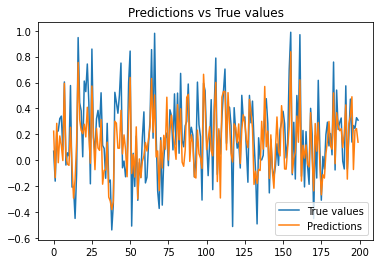

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()

In [ ]:
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = -a * np.exp(-b * np.sqrt(1/d * np.sum(x**2)))
    sum2 = -np.exp(1/d * np.sum(np.cos(c*x)))
    return sum1 + sum2 + a + np.exp(1)

input_data = np.random.uniform(low=-5.0, high=5.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(ackley, 1, input_data)

In [ ]:
train_size = int(len(input_data) * 0.8)
X_train, X_test = input_data[:train_size], input_data[train_size:]
y_train, y_test = output_data[:train_size], output_data[train_size:]

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss='logcosh')

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=8)
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
predictions = model.predict(X_test)

Epoch 1/20
100/100 [==============================] - 1s 3ms/step - loss: 7.1931
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 2.1857
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 1.6278
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 1.5598
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 1.5201
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 1.4793
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 1.4368
Epoch 8/20
100/100 [==============================] - 0s 3ms/step - loss: 1.3780
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 1.3169
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 1.2366
Epoch 11/20
100/100 [==============================] - 0s 3ms/step - loss: 1.1440
Epoch 12/20
100/100 [==============================] - 0s 3ms/step - loss: 1.0095
Epoch 13/20
100/100 [====

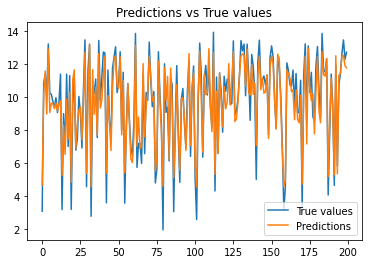

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()

In [ ]:
def rosenbrock(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

input_data = np.random.uniform(low=-2.0, high=2.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(rosenbrock, 1, input_data)
output_data = output_data/max(output_data)

In [ ]:
train_size = int(len(input_data) * 0.8)
X_train, X_test = input_data[:train_size], input_data[train_size:]
y_train, y_test = output_data[:train_size], output_data[train_size:]

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss='mae')

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=8)
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
predictions = model.predict(X_test)

Epoch 1/20
100/100 [==============================] - 1s 3ms/step - loss: 0.1204
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1088
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1005
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0926
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0854
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0695
Epoch 8/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0642
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0594
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 11/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 12/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 13/20
100/100 [====

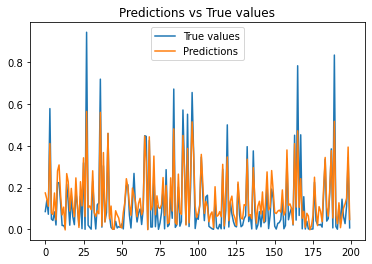

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()

# Zadanie 7: Stwórz sieć rekurencyjną z wykorzystaniem SimpleRRN (i/lub LSTM i/lub GRU) do dla zbioru danych [20newsgropus](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load data
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Tokenize text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(newsgroups_train.data)
x_train = tokenizer.texts_to_sequences(newsgroups_train.data)
x_test = tokenizer.texts_to_sequences(newsgroups_test.data)

# Pad sequences to ensure uniform length
max_length = max(len(sequence) for sequence in x_train)
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# One-hot encoding of the labels
y_train = to_categorical(newsgroups_train.target)
y_test = to_categorical(newsgroups_test.target)

In [ ]:
# Build the model
inputs = Input(shape=(max_length,))
x = Embedding(input_dim=10000, output_dim=100, input_length=max_length)(inputs)
x = LSTM(64)(x)  # Using LSTM layer
x = Dense(units=32, activation='relu')(x)
outputs = Dense(units=20, activation='softmax')(x) # Adjust the output units to match the number of categories

model = Model(inputs=inputs, outputs=outputs)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Prediction and evaluation
predicted_probabilities = model.predict(x_test[:10])
predicted_categories = np.argmax(predicted_probabilities, axis=1)

# Display predictions
for i in range(len(predicted_categories)):
    print("Input:", newsgroups_test.data[i])
    print("True category:", newsgroups_train.target_names[newsgroups_test.target[i]])
    print("Predicted category:", newsgroups_train.target_names[predicted_categories[i]])
    print("-----------------------------")

In [ ]:
# Prediction and evaluation
predicted_probabilities = model.predict(x_test[:10])
predicted_categories = np.argmax(predicted_probabilities, axis=1)

# Display predictions
for i in range(len(predicted_categories)):
    print("Input:", newsgroups_test.data[i])
    print("True category:", newsgroups_train.target_names[newsgroups_test.target[i]])
    print("Predicted category:", newsgroups_train.target_names[predicted_categories[i]])
    print("-----------------------------")